<h1><center>CSE391 Data Science</center></h1>

<h1><center>Lecture 6</center></h1>
<h1><center>Sept. 17th ,2018 </center></h1>



# Course topics ( a review)
1. <font color=red >Introdunction to data science </font>
2. <font color=red >Numpy, array and vector manipulation</font>
3. <font color=red >Linear Algebra Basics</font>
4. <font color=red >Statistics  Basics</font>
5. Data wrangling (Python Pandas)
6. Data visualizaton
7. Linear regression
8. Supervised learning
9. Unsupervised learning
10. Introduction to deep learning
11. Natural language processing
12. Network analysis
13. Bayesian inference and introduction to Bayesian networks
14. Dimensionality reduction
15. Statistical hypothesis testing

In [2]:
# generate N Gaussian samples  and compute the sample mean
import numpy as np
mean = [0, 0]
cov = [[1, 0], [0, 100]]
N = 500
X = np.random.multivariate_normal(mean, cov, N)
#print(X)

barx = np.sum(X, axis=0)/N

print(barx)

[-0.03399344  0.01275346]


##  Practice: Implement Mahalanobis distance
- dissimilarity measure between two random vectors ${\displaystyle {\underline {x}}}$ and ${\displaystyle {}} \underline{y}$ of the same distribution with the covariance matrix S:

$\huge d(x,y)= \sqrt{(x-y)^T S^{-1}(x-y)}$

# Correlation Analysis (topic from intro to statistics)
- Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables (SRC) [SRC](http://www-hsc.usc.edu/~eckel/biostat2/slides/lecture8.pdf)

## Correlation analysis
- Measures strength and direction of the linear relationship between
two variables
## Steps:
- Plot the data (or have a computer to do so)
- Visually inspect the relationship between two continous variables
- Is there a linear relationship (correlation)?
- Are there outliers?
- Are the distributions skewed?

# Correlation coefficients:
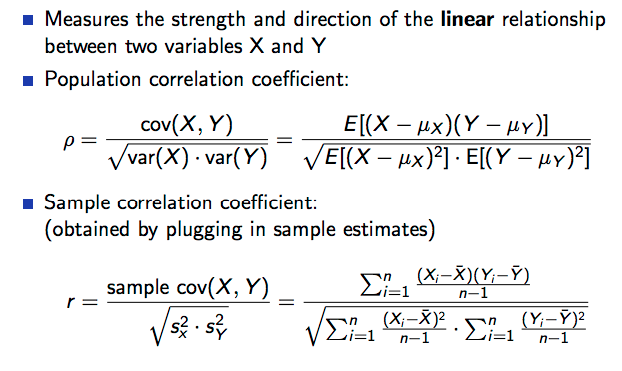

#### The correlation coefficient, $\rho$, takes values between -1 and +1
- -1: Perfect negative linear relationship
- 0: No linear relationship
- +1: Perfect positive relationship
- positive correlation :The correlation is said to be positive correlation if the values of two variables changing with same direction.
- The correlation is said to be negative correlation when the values of variables change with opposite direction.

# Degree of correlation
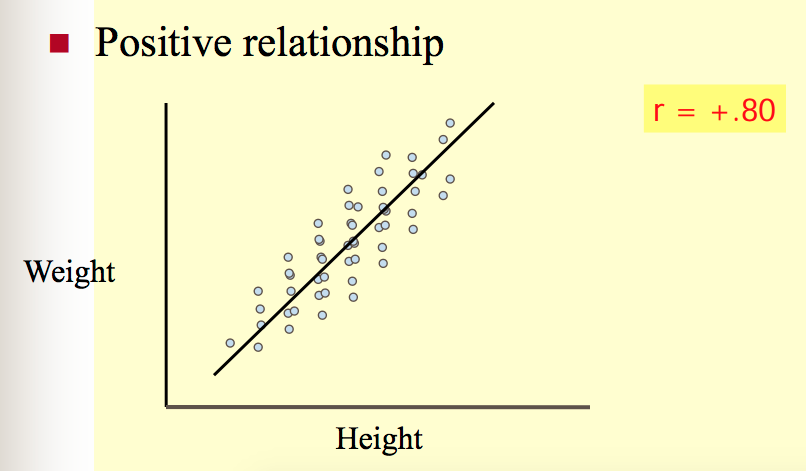

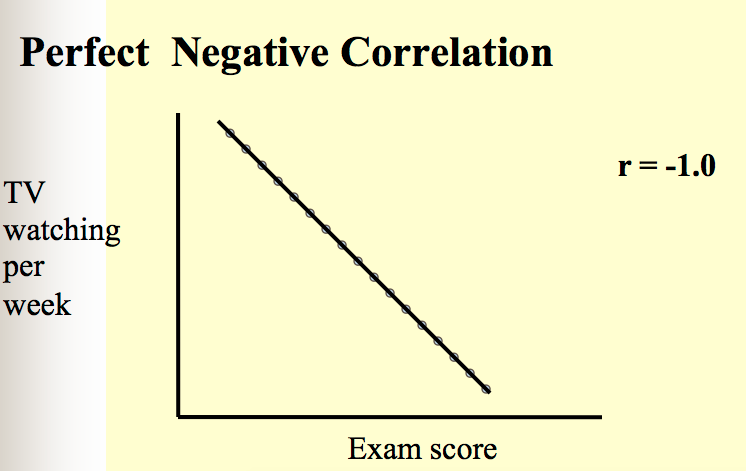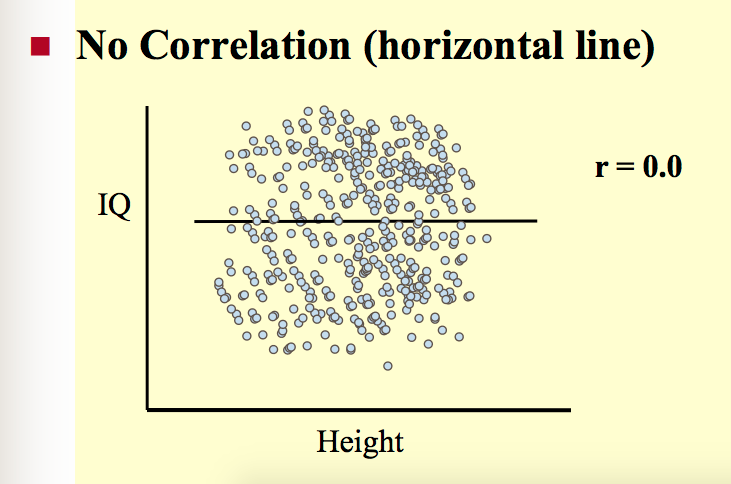

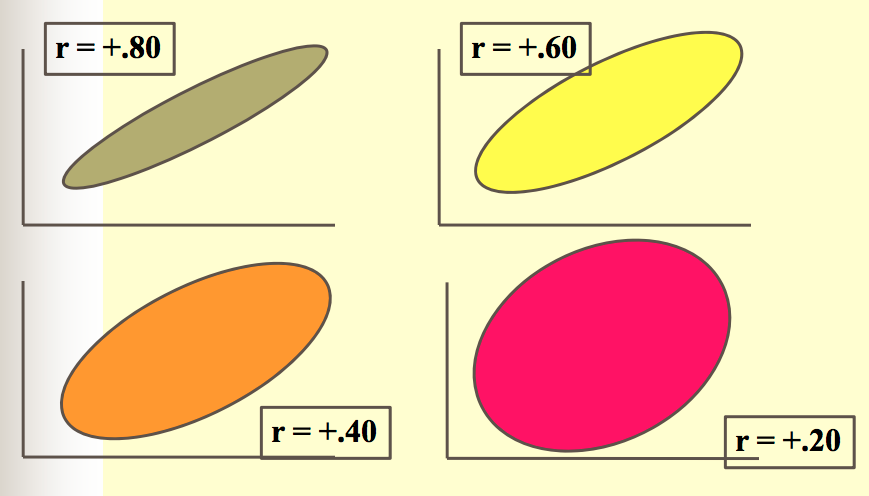

# Properties of Correlation
- The correlation coefficient lies between -1 & +1

- The correlation coefficient is independent of the change of origin & scale.
- The coefficient of correlation is the geometric mean of two regression coefficient
- Always assume linear relationship
- Value of Correlation Coefficient is affected by the extreme values
- Time consuming methods

## Several level of correlation
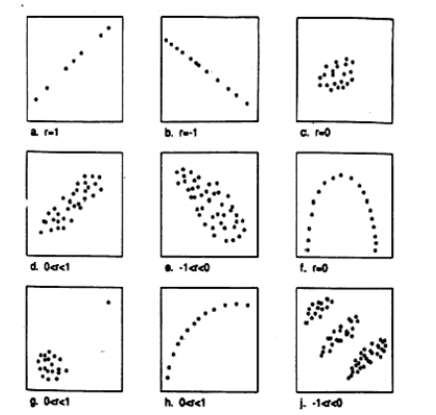


Different methods for computing correlation coefficients

- Pearson
- Kendall
- Spearman

# How to compute the correlation coefficients in Python
## There are several methods; most important ones:


In [34]:
from scipy.stats.stats import pearsonr
? pearsonr

# example
x = [1, 2, 3, 4, 5]

y = [2, 4, 6, 8, 10]
corr, p_value = pearsonr(x, y)
corr


1.0

### Using numpy builtin function

[[ 1.          0.81543901]
 [ 0.81543901  1.        ]]


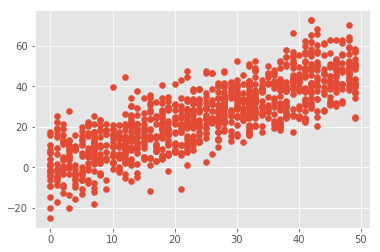

In [35]:
import numpy as np

np.random.seed(1)

# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)

# Positive Correlation with some noise
y = x + np.random.normal(0, 10, 1000)

print(np.corrcoef(x, y))


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(x, y)
plt.show()

# Data Wrangling For Data Science

# Pandas highlights
- A fast and efficient DataFrame object 
- Tools for reading and writing data between in-memory data structures and different formats
- Intelligent data alignment and integrated handling of missing data
- Flexible reshaping and pivoting of data sets;
- Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
- Columns can be inserted and deleted from data structures 
- Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
- Time series-functionality: date range generation and frequency conversion, moving window statistics, moving - window linear regressions, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data;
- Highly optimized for performance, with critical code paths written in  C.


# Introduction to pandas series
- A Series is a one-dimensional array-like object containing a sequence of values (of similar types to NumPy types) and an associated array of data labels, called its index

In [44]:
import pandas as pd
import numpy as np

data = np.random.randn(5)
index = ['a','b','c','d','e']
S = pd.Series(data, index)
print(S)
print(S.values)
print(S.index)

a    0.993406
b   -0.132637
c   -0.758387
d   -1.384529
e    1.893290
dtype: float64
[ 0.99340612 -0.13263738 -0.75838718 -1.3845294   1.89328971]
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


# Note 1 on series
- If data is a dict, if index is passed the values in data corresponding to the labels in the index will be pulled out. Otherwise, an index will be constructed from the sorted keys of the dict, if possible.

In [2]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [3]:
pd.Series(d, index=['b', 'c', 'd', 'a'])


b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

# Series are much like arrays.
- valid arguments to most NumPy functions
- series is like dict
- Key difference between Array and Series

# Vectorized operations and label alignment with Series

In [5]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s+s
s*s

a    0.001187
b    0.152606
c    2.447825
d    0.951420
e    3.927580
dtype: float64

# Key difference between array and series
- Series automatically align the data based on label

In [41]:
s[1:]+s[:-1]

NameError: name 's' is not defined

#  Series name attribute
- Series can also have a name attribute:

In [7]:
s = pd.Series(np.random.randn(5), name='something')

s.name

'something'

# The most import Pandas data object: Data frames
- A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). The DataFrame has both a row and column index

# Data frame acceptable inputs:
- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A Series
- Another DataFrame

In [47]:
import pandas as pd
DF1 = pd.DataFrame(np.random.randint(low=0, high=10, size=(500, 5)),
                   columns=['a', 'b', 'c', 'd', 'e'])

DF1.head(10)

,a,b,c,d,e
0,6,6,4,0,8
1,5,0,3,5,1
2,5,1,4,0,6
3,0,4,3,9,0
4,6,9,0,8,1
5,4,2,5,5,1
6,2,7,3,0,7
7,3,2,6,6,0
8,8,8,4,4,1
9,6,8,5,9,4


In [47]:
DF1 = pd.DataFrame(np.random.randint(low=0, high=10, size=(5, 5)),
                   index = ['t1','t2','t3','t4','t5'],
                   columns=['a', 'b', 'c', 'd', 'e'])
DF1

,a,b,c,d,e
t1,7,0,5,2,8
t2,2,0,2,7,6
t3,0,1,5,7,0
t4,8,5,7,8,8
t5,8,4,3,3,0


# Column selection, addition , deletion

In [52]:
# sum
DF1['f'] = DF1['a']+DF1['d']
DF1

DF1.drop(['d'],axis = 1)

#A column in a DataFrame can be retrieved as a Series either by dict-like notation or by attribute

DF1.head(2)




,a,b,c,d,e,f
t1,7,0,5,2,8,9
t2,2,0,2,7,6,9



df = pd.DataFrame([('falcon', 'bird',    389.0),
...                    ('parrot', 'bird',     24.0),
...                    ('lion',   'mammal',   80.5),
...                    ('monkey', 'mammal', np.nan)],
...                   columns=('name', 'class', 'max_speed'))

x = df.pop('class')
x


# Selection with loc and iloc
Y = df.iloc[:,1]

# Function Application and Mapping
- NumPy ufuncs (element-wise array methods) also work with pandas objects

In [53]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
.....: index=['Utah', 'Ohio', 'Texas', 'Oregon'])
np.abs(frame)

,b,d,e
Utah,1.229799,0.117755,0.209891
Ohio,0.245241,0.189417,1.007792
Texas,0.099030,0.431307,1.621503
Oregon,0.932759,0.341830,0.138251


- Another frequent operation is applying a function on one-dimensional arrays to each column or row. DataFrame’s apply method does exactly this:

In [54]:
f = lambda x: x.max() - x.min()
frame.apply(f)

b    1.130769
d    0.773136
e    2.629296
dtype: float64

- Many of the most common array statistics (like sum and mean) are DataFrame methods, so using apply is not necessary.


In [ ]:
def f(x):
.....: return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

# Loading and Handling Time Series in Pandas


# Working on AirPassengers data set:
- The classic Box & Jenkins airline data. Monthly totals of international airline passengers, 1949 to 1960.

- source AARSHAY JAIN 



# First step

In [ ]:
import pandas as pd
import numpy as np
import datetime as dtime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# Now, we can load the data set and look at some initial rows and data types of the columns:

In [24]:
filepath = '/Users/martin/Documents/MyLecturesSBU/Fall2018/CSE391/data/AirPassengers.csv'
data = pd.read_csv(filepath)
print(data.head(10))
print('\n Data Types:')
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121
5  1949-06          135
6  1949-07          148
7  1949-08          148
8  1949-09          136
9  1949-10          119

 Data Types:
Month          object
#Passengers     int64
dtype: object


In [25]:
?pd.read_csv